In [175]:
pip install yfinance

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [177]:
aaa=pd.read_csv('nse11.csv')

In [178]:
aaa

,Symbol (25),Allo
0,INOXLEISUR.NS,0.233827
1,ASTRAL.NS,0.155844
2,LTI.NS,0.114778
3,NAUKRI.NS,0.085196
4,DMART.NS,0.075473
5,VEDL.NS,0.052648
6,BALKRISIND.NS,0.051712
7,RELIANCE.NS,0.038025
8,TATACHEM.NS,0.035226
9,TATAPOWER.NS,0.034862


In [179]:
abc=aaa['Allo'].to_list()

In [180]:
abc=np.array(abc)

In [181]:
abc

array([0.23382726, 0.15584371, 0.11477813, 0.0851962 , 0.07547294,
       0.05264836, 0.05171222, 0.03802521, 0.03522627, 0.03486227,
       0.02611955, 0.02071376, 0.01821344, 0.01748049, 0.01646868,
       0.01185136, 0.01156016])

In [182]:
stocks=aaa['Symbol (25)']

In [183]:
c=[]

In [184]:
for i in range(0,len(stocks)):
  b=yf.download(stocks[i],start='2017-09-01',interval='1d')
  c.append(b['Adj Close'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [185]:
c=pd.DataFrame(c)

In [186]:
c=c.T

In [187]:
c

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,
2017-09-01,252.288940,415.861359,711.373474,937.792969,1048.400024,204.766571,785.599854,782.770935,523.002502,69.723259,390.850006,231.264221,287.845795,246.824142,22.181377,291.408600,436.665314
2017-09-04,245.057892,406.568207,713.014282,940.159729,1020.650024,205.319214,768.392883,784.350952,517.652527,68.286995,383.399994,226.258499,287.878571,246.388992,23.400135,290.236298,424.827606
2017-09-05,246.454239,402.175598,714.655090,945.731628,1077.699951,206.814575,772.551941,793.709595,513.015930,68.199966,388.149994,225.475037,287.025757,246.171417,25.106396,290.724792,427.809937
2017-09-06,246.105148,413.650085,724.218872,946.717712,1066.599976,206.912048,766.244080,799.932495,517.295898,67.895309,382.700012,227.738480,286.140137,239.948578,27.495163,288.526733,463.506683
2017-09-07,244.509323,418.849487,724.546997,954.853577,1076.199951,212.470901,781.549438,795.459717,550.108887,67.329514,378.149994,229.131378,284.155640,235.335846,28.616421,285.889130,451.990112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,389.750000,2241.100098,6978.299805,5414.950195,4697.799805,332.549988,2206.149902,2340.449951,883.599976,215.800003,470.200012,866.200012,1047.750000,217.949997,204.600006,728.299988,1453.949951
2021-12-20,372.850006,2097.000000,6736.049805,5142.700195,4618.950195,323.200012,2114.750000,2277.350098,842.349976,209.100006,447.049988,827.799988,1047.550049,212.399994,195.800003,709.950012,1407.250000
2021-12-21,381.549988,2105.000000,6976.450195,5178.399902,4587.399902,336.850006,2095.449951,2311.250000,856.450012,211.899994,453.600006,839.349976,1107.050049,212.500000,199.800003,720.349976,1405.300049


In [188]:
log_ret = np.log(c/c.shift(1))
log_ret.head()

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,-0.029081,-0.022600,0.002304,0.002521,-0.026826,0.002695,-0.022146,0.002016,-0.010282,-0.020815,-0.019245,-0.021883,0.000114,-0.001765,0.053489,-0.004031,-0.027484
2017-09-05,0.005682,-0.010863,0.002299,0.005909,0.054389,0.007257,0.005398,0.011861,-0.008997,-0.001275,0.012313,-0.003469,-0.002967,-0.000883,0.070381,0.001682,0.006996
2017-09-06,-0.001417,0.028132,0.013294,0.001042,-0.010353,0.000471,-0.008198,0.007810,0.008308,-0.004477,-0.014140,0.009989,-0.003090,-0.025603,0.090887,-0.007589,0.080142
2017-09-07,-0.006505,0.012491,0.000453,0.008557,0.008960,0.026511,0.019778,-0.005607,0.061501,-0.008368,-0.011960,0.006098,-0.006960,-0.019411,0.039971,-0.009184,-0.025161


In [189]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks)))
ret_arr1 = np.zeros(num_ports)
vol_arr1 = np.zeros(num_ports)
sharpe_arr1 = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(17))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr1[ind] = np.sum((log_ret.mean() * weights) *252)
    vol_arr1[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr1[ind] = ret_arr1[ind]/vol_arr1[ind]

In [190]:
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * abc) *252
print(exp_ret)
print('\n')
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(abc.T, np.dot(log_ret.cov() * 252, abc)))
print(exp_vol)
print('\n')
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Expected Portfolio Return
0.27676386355585414


Expected Volatility
0.22288177194555606


Sharpe Ratio
1.241751898955021


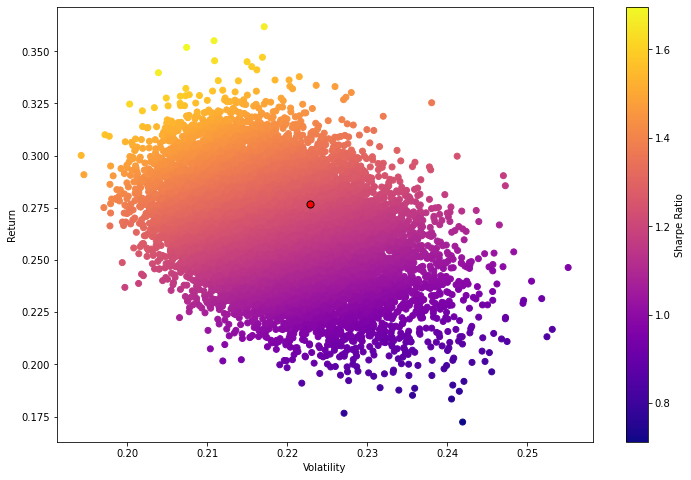

In [191]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr1,ret_arr1,c=sharpe_arr1,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(exp_vol,exp_ret,c='red',s=50,edgecolors='black')

In [192]:
aaa['Optimal_Allocation']=all_weights[sharpe_arr1.argmax()]

In [193]:
ab=all_weights[sharpe_arr1.argmax()]

In [194]:
aaa['Status']=["UnderWeight" if ab[i]>abc[i] else "OverWeight" for i in range(0,17)]

Optimal Portfolio

In [195]:
aaa

,Symbol (25),Allo,Optimal_Allocation,Status
0,INOXLEISUR.NS,0.233827,0.016115,OverWeight
1,ASTRAL.NS,0.155844,0.114447,OverWeight
2,LTI.NS,0.114778,0.105385,OverWeight
3,NAUKRI.NS,0.085196,0.083501,OverWeight
4,DMART.NS,0.075473,0.088854,UnderWeight
5,VEDL.NS,0.052648,0.033853,OverWeight
6,BALKRISIND.NS,0.051712,0.022767,OverWeight
7,RELIANCE.NS,0.038025,0.053809,UnderWeight
8,TATACHEM.NS,0.035226,0.018547,OverWeight
9,TATAPOWER.NS,0.034862,0.050757,UnderWeight


VAR

Historical var


In [196]:
abc1=abc*10000000

In [197]:
abc1

array([2338272.57, 1558437.07, 1147781.29,  851962.05,  754729.4 ,
        526483.56,  517122.24,  380252.06,  352262.72,  348622.66,
        261195.54,  207137.63,  182134.36,  174804.9 ,  164686.78,
        118513.6 ,  115601.57])

In [198]:
c=c.pct_change().shift(1)

In [199]:
c=c[2:]

In [200]:
c

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,
2017-09-05,-0.028662,-0.022347,0.002307,0.002524,-0.026469,0.002699,-0.021903,0.002018,-0.010229,-0.020599,-0.019061,-0.021645,0.000114,-0.001763,0.054945,-0.004023,-0.027109
2017-09-06,0.005698,-0.010804,0.002301,0.005927,0.055896,0.007283,0.005413,0.011932,-0.008957,-0.001274,0.012389,-0.003463,-0.002962,-0.000883,0.072917,0.001683,0.007020
2017-09-07,-0.001416,0.028531,0.013382,0.001043,-0.010300,0.000471,-0.008165,0.007840,0.008343,-0.004467,-0.014041,0.010039,-0.003086,-0.025278,0.095146,-0.007561,0.083441
2017-09-08,-0.006484,0.012570,0.000453,0.008594,0.009001,0.026866,0.019975,-0.005591,0.063432,-0.008333,-0.011889,0.006116,-0.006935,-0.019224,0.040780,-0.009142,-0.024847
2017-09-11,-0.014277,0.009346,0.004335,0.015440,-0.004971,0.010098,-0.008924,-0.001467,0.010779,-0.004525,-0.008198,0.012918,0.007157,0.007212,-0.025554,-0.002221,-0.005279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,-0.041570,0.004966,0.024552,0.006161,-0.001548,0.053174,0.002247,0.012936,-0.016164,-0.026114,0.000610,-0.030526,0.036422,-0.005133,0.006969,-0.014756,0.000410
2021-12-20,-0.011414,-0.015680,0.020286,-0.017634,-0.009342,-0.033285,-0.020729,-0.026395,-0.025692,-0.027490,-0.044212,-0.010001,0.008761,-0.022207,-0.023389,-0.017338,-0.007136
2021-12-21,-0.043361,-0.064299,-0.034715,-0.050277,-0.016784,-0.028116,-0.041430,-0.026961,-0.046684,-0.031047,-0.049234,-0.044332,-0.000191,-0.025465,-0.043011,-0.025196,-0.032119


In [201]:
pct=c.to_numpy()

In [202]:
pct

array([[-0.02866177, -0.02234675,  0.00230654, ...,  0.05494508,
        -0.00402288, -0.02710934],
       [ 0.00569803, -0.01080411,  0.00230123, ...,  0.0729167 ,
         0.00168309,  0.0070201 ],
       [-0.00141645,  0.02853104,  0.01338237, ...,  0.09514577,
        -0.00756062,  0.08344067],
       ...,
       [-0.04336111, -0.06429882, -0.03471476, ..., -0.04301077,
        -0.02519563, -0.03211937],
       [ 0.02333373,  0.00381497,  0.03568863, ...,  0.02042901,
         0.01464887, -0.00138565],
       [-0.01821513,  0.02097383,  0.02143638, ...,  0.01051046,
         0.01728328,  0.02842806]])

In [203]:
pct1=pct*abc1

In [204]:
pct1

array([[ -67019.03986544,  -34826.01123599,    2647.39818457, ...,
           9048.72884435,    -476.76616113,   -3133.88201778],
       [  13323.54559583,  -16837.52941897,    2641.30591895, ...,
          12008.41691451,     199.46948905,     811.53404929],
       [  -3312.05063617,   44463.82738627,   15360.03855474, ...,
          15669.24976769,    -896.03605046,    9645.87220795],
       ...,
       [-101390.10176092, -100205.66873072,  -39844.95153328, ...,
          -7083.30461071,   -2986.02458197,   -3713.0491803 ],
       [  54560.62279989,    5945.39654745,   40962.74203259, ...,
           3364.38769016,    1736.08997635,    -160.18292193],
       [ -42591.93307921,   32686.38691182,   24604.27050118, ...,
           1730.93455938,    2048.30404207,    3286.32812668]])

In [205]:
sum(pct1[0])

-141258.81791293956

In [206]:
l11=[]
for i in range(0,len(pct1)):
  l11.append(sum(pct1[i]))

In [207]:
l11=sorted(l11)

In [208]:
print('Var at 95% Confidnce Interval: ',l11[int(len(l11)*0.05)])
print('CVar at 95% Confidnce Interval:',sum(l11[:int(len(l11)*0.05)])/int(len(l11)*0.05))

Var at 95% Confidnce Interval:  -193910.09665814016
CVar at 95% Confidnce Interval: -330541.9100973244


Variance Method


In [209]:
exp_vol

0.22288177194555606

In [210]:
print('Var at 95% Confidnce Interval: ',-((exp_ret*10000000/np.sqrt(252))-1.65*exp_vol/np.sqrt(252)))

Var at 95% Confidnce Interval:  -174344.82322842747
